In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/diamonds/diamonds.csv


In [18]:
df = pd.read_csv('/kaggle/input/diamonds/diamonds.csv')

In [23]:
df.rename(columns = {'Unnamed: 0': 'idx'}, inplace=True)

In [24]:
df.set_index('idx', inplace=True)

In [25]:
for column in df.columns:
    print(df[column].value_counts(), '\n')

carat
0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
3.02       1
3.65       1
3.50       1
3.22       1
3.11       1
Name: count, Length: 273, dtype: int64 

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64 

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64 

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64 

depth
62.0    2239
61.9    2163
61.8    2077
62.2    2039
62.1    2020
        ... 
71.3       1
44.0       1
53.0       1
53.1       1
54.7       1
Name: count, Length: 184, dtype: int64 

table
56.0    9881
57.0    9724
58.0    8369
59.0    6572
55.0    6268
        ... 
51.6       1
63.5       1
43.0       1
62.4       1
61.6       1
Name: count, Length: 127, dtype: int64 

price
605      132
802      127
625      126

# Each row represents one diamond.

| **Column** | **Description** |
|:------------|:-----------------|
| <div style="vertical-align: top;">**carat**  | A numeric value representing the weight of the diamond. One carat is equivalent to 200 milligrams. It is one of the most important factors determining a diamond's value and price. |
| <div style="vertical-align: top;">**cut**    | A categorical variable representing the quality of the cut of the diamond. It describes how well the diamond has been cut from its raw form into its final shape. The categories, from least valuable to most valuable, are:<br>- Fair<br>- Good<br>- Very Good<br>- Premium<br>- Ideal |
| <div style="vertical-align: top;">**color**  | A categorical variable representing the color grade of the diamond. The grades range from D (colorless) to J (light color), with colorless diamonds being the most valuable. The categories are:<br>- J<br>- I<br>- H<br>- G<br>- F<br>- E<br>- D |
| <div style="vertical-align: top;">**clarity**| A categorical variable representing the clarity of the diamond, which measures the presence of internal or external flaws (inclusions and blemishes). The categories, from least valuable to most valuable, are:<br>- I1 (Included 1)<br>- SI2 (Slightly Included 2)<br>- SI1 (Slightly Included 1)<br>- VS2 (Very Slightly Included 2)<br>- VS1 (Very Slightly Included 1)<br>- VVS2 (Very, Very Slightly Included 2)<br>- VVS1 (Very, Very Slightly Included 1)<br>- IF (Internally Flawless) |
| <div style="vertical-align: top;">**depth**  | A numeric value representing the total depth percentage of the diamond, calculated as (z / mean(x, y)) * 100. It is an important factor in determining the overall appearance and brilliance of the diamond. |
| <div style="vertical-align: top;">**table**  | A numeric value representing the width of the diamond's table expressed as a percentage of its average diameter. The table is the largest facet on the top of the diamond. |
| <div style="vertical-align: top;">**price**  | A numeric value representing the price of the diamond in US dollars. This is influenced by many factors, including carat, cut, color, and clarity. |
| <div style="vertical-align: top;">**x**      | A numeric value representing the length of the diamond in millimeters. |
| <div style="vertical-align: top;">**y**      | A numeric value representing the width of the diamond in millimeters. |
| <div style="vertical-align: top;">**z**      | A numeric value representing the depth of the diamond in millimeters. |


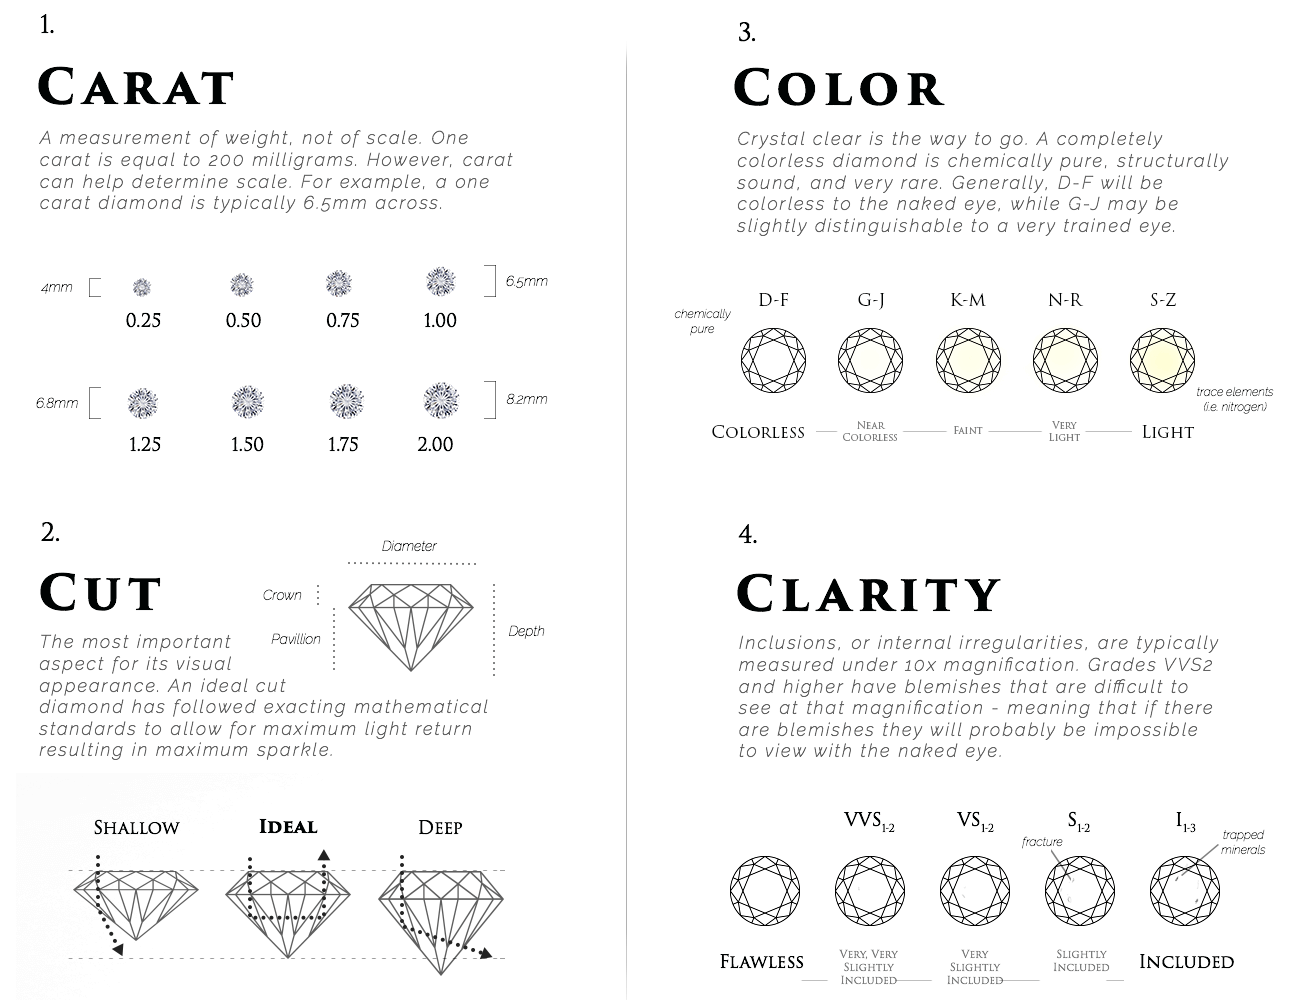

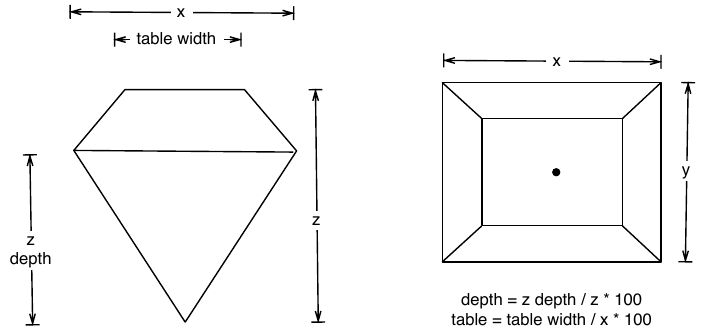

In [27]:
df.describe(include="all")

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [28]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


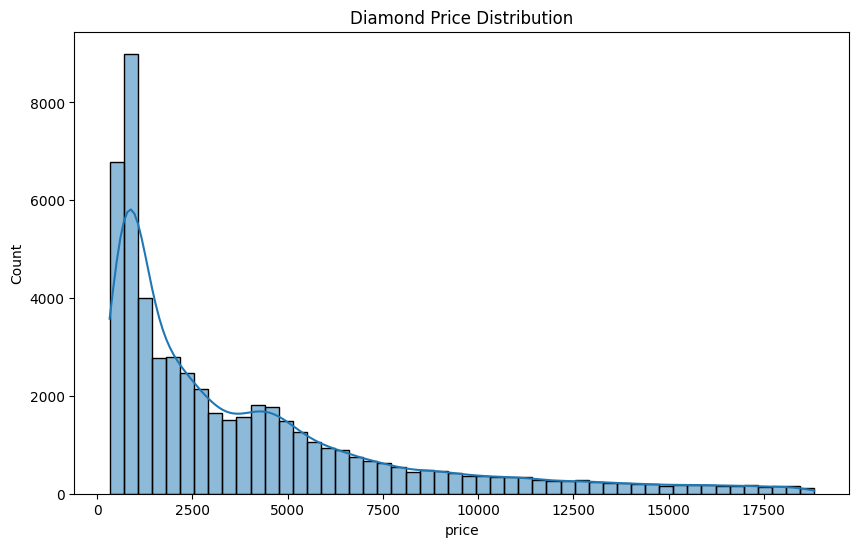

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins = 50, kde=True)
plt.title('Diamond Price Distribution')
plt.show()

# Analyzing Carat Weight and Price:

Set a scatterplot to evaluate the relationship between `carat` and `price`

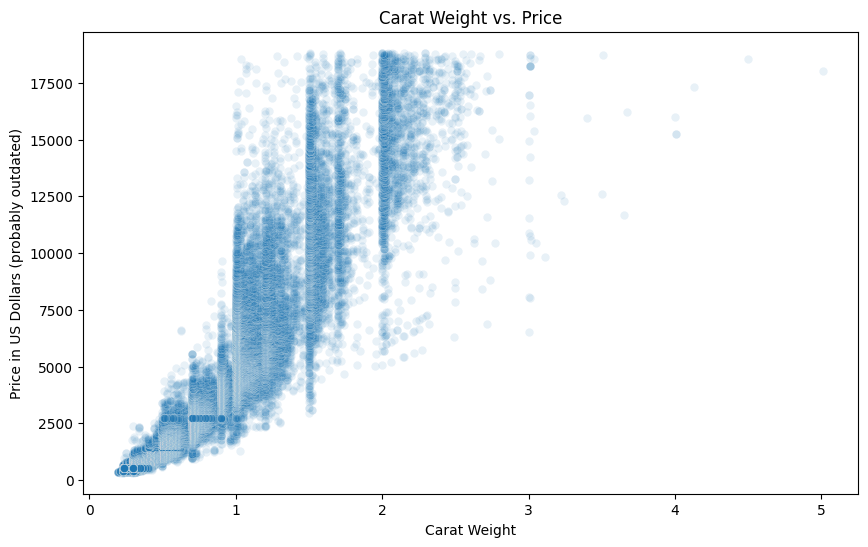

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'carat', y = 'price', data=df, alpha = 0.1)
plt.title('Carat Weight vs. Price')
plt.xlabel('Carat Weight')
plt.ylabel('Price in US Dollars (probably outdated)')
plt.show()

# Show box plots of cut, color, and clarity VS price:

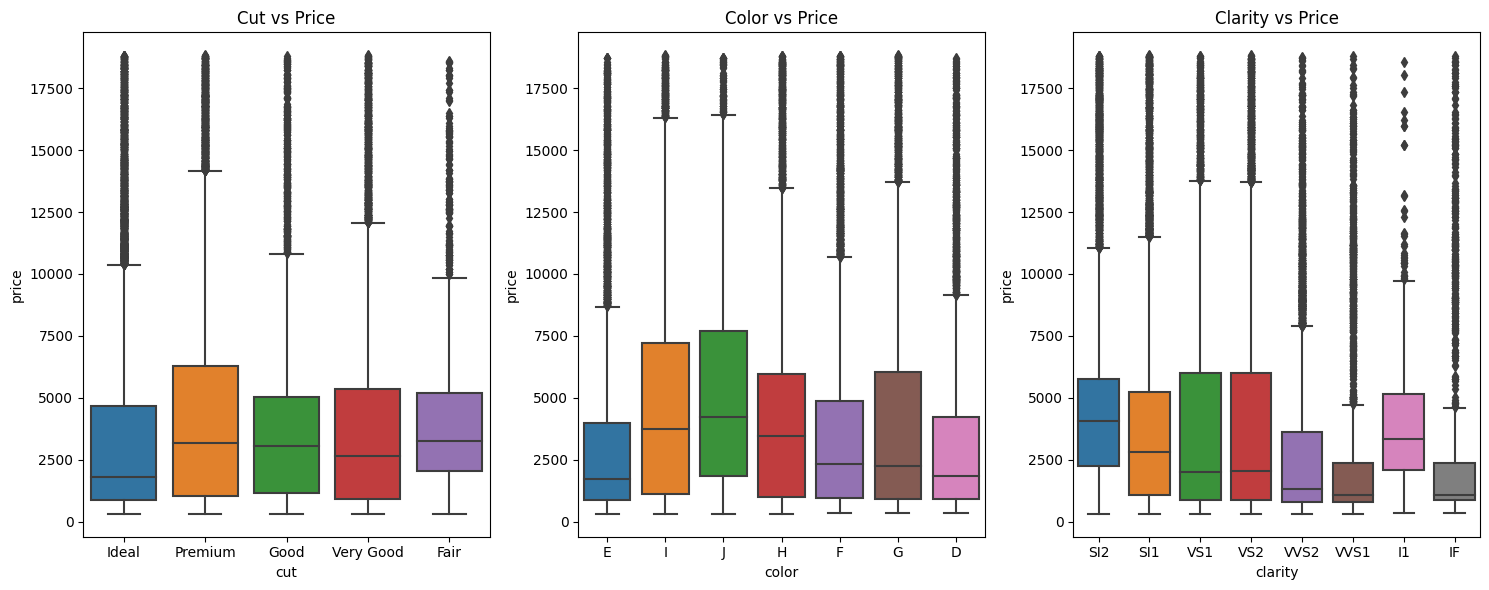

In [42]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x = 'cut', y = 'price', data=df)
plt.title('Cut vs Price')

plt.subplot(1, 3, 2)
sns.boxplot(x = 'color', y = 'price', data=df)
plt.title('Color vs Price')

plt.subplot(1, 3, 3)
sns.boxplot(x = 'clarity', y = 'price', data=df)
plt.title('Clarity vs Price')
plt.tight_layout()
plt.show()

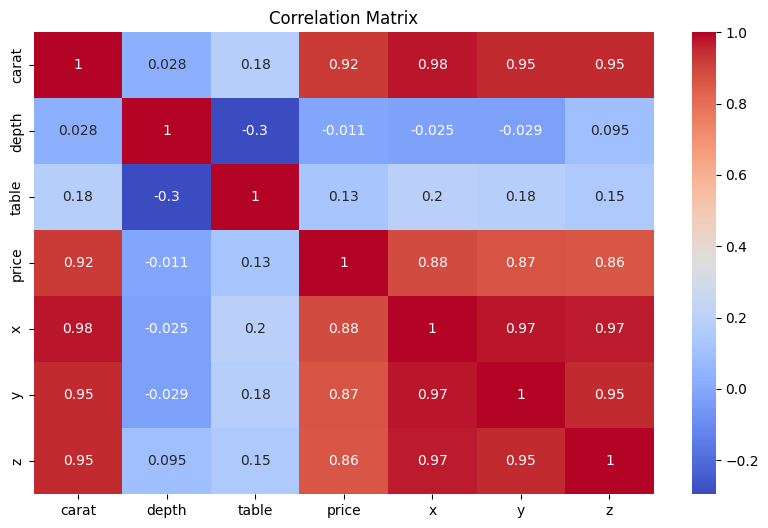

In [45]:
corr_matrix = df.corr(numeric_only = True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()